# Exploratory Data Analysis

## Import Libraries & Data Prep Notebook

In [161]:
# Import libraries

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# Run an external Jupyter notebook file to execute its code within the current notebook environment

%run /Users/emmam/Documents/Flatiron/phase_2/film-analytics/code/data_prep.ipynb

C:\Users\emmam\Documents\Flatiron\phase_2\film-analytics\data
Shape of df before concatenation: (1345, 17)
Shape of genre_df before concatenation: (1345, 21)
First few rows of df:
                         primary_title  start_year  average_rating  num_votes  \
0   diary of a wimpy kid rodrick rules        2011             6.6      23135   
3        diary of a wimpy kid dog days        2012             6.3      19571   
6   diary of a wimpy kid the long haul        2017             4.4       5635   
8                       blue valentine        2010             7.4     170089   
14          the place beyond the pines        2012             7.3     226765   

            director                               title studio  \
0       David Bowers  diary of a wimpy kid rodrick rules    FOX   
3       David Bowers       diary of a wimpy kid dog days    FOX   
6       David Bowers  diary of a wimpy kid the long haul    FOX   
8   Derek Cianfrance                      blue valentine   WEIN  

## Define Functions

In [163]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'worldwide_gross' column
df_cleaned = remove_outliers(df, 'worldwide_gross').copy()

# Check the shape after removing outliers
print("Shape after removing outliers in 'worldwide_gross':", df_cleaned.shape)

Shape after removing outliers in 'worldwide_gross': (1216, 36)


In [164]:
# Calculate the Return on Investment (ROI) for each movie and add it as a new column in the DataFrame
df_cleaned.loc[:, 'roi'] = ((df_cleaned['worldwide_gross'] - df_cleaned['production_budget']) / df_cleaned['production_budget']) * 100

## Descriptive Statistics

In [165]:
# Display summary statistics for numerical columns in the cleaned DataFrame
df_cleaned.describe()

,start_year,average_rating,num_votes,domestic_gross,year,popularity,vote_average,vote_count,production_budget,worldwide_gross,...,crime,documentary,science fiction,mystery,music,romance,family,war,tv movie,roi
count,1216.000000,1216.000000,1.216000e+03,1.216000e+03,1216.000000,1216.000000,1216.000000,1216.000000,1.216000e+03,1.216000e+03,...,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,2013.581414,6.372204,1.008837e+05,4.055098e+07,2013.682566,11.652606,6.294655,1587.617599,3.645536e+07,9.176829e+07,...,0.138158,0.018914,0.095395,0.080592,0.032072,0.141447,0.090461,0.024671,0.000822,346.556553
std,2.520686,0.920226,1.198007e+05,4.113295e+07,2.528434,6.361954,0.916127,1864.783652,4.052140e+07,9.799419e+07,...,0.345208,0.136279,0.293880,0.272320,0.176265,0.348626,0.286958,0.155184,0.028677,1399.881730
min,2010.000000,1.600000,7.000000e+00,8.000000e+02,2010.000000,0.600000,0.000000,1.000000,5.000000e+04,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000
25%,2011.000000,5.800000,2.329725e+04,6.800000e+06,2011.000000,8.118500,5.800000,339.750000,1.000000e+07,1.709715e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.097119
50%,2013.500000,6.400000,6.441800e+04,2.880000e+07,2014.000000,10.729000,6.300000,947.000000,2.500000e+07,5.647583e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.365930
75%,2016.000000,7.000000,1.278368e+05,5.970000e+07,2016.000000,14.502750,6.900000,2138.500000,4.700000e+07,1.346193e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.443430
max,2019.000000,8.700000,1.035358e+06,2.138000e+08,2018.000000,78.123000,10.000000,14454.000000,2.750000e+08,4.181870e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41556.474000


## Correlation Analysis

In [166]:
# Calculate the correlation matrix for the cleaned DataFrame
corr = df_cleaned.corr()
corr

,start_year,average_rating,num_votes,domestic_gross,year,popularity,vote_average,vote_count,production_budget,worldwide_gross,...,crime,documentary,science fiction,mystery,music,romance,family,war,tv movie,roi
start_year,1.000000,0.022195,-0.124728,0.035140,0.892397,0.247105,0.050710,0.031453,-0.013780,0.040698,...,-0.009154,-0.020060,0.006173,0.013215,-0.012365,-0.114266,-0.001087,0.009589,0.004766,0.044370
average_rating,0.022195,1.000000,0.447621,0.104461,-0.006165,0.167193,0.653842,0.327523,-0.026723,0.085530,...,0.064953,0.040948,0.009509,-0.013059,-0.039152,0.012009,-0.118259,0.050913,0.019580,-0.039570
num_votes,-0.124728,0.447621,1.000000,0.520452,-0.138901,0.405501,0.325361,0.837335,0.317842,0.546442,...,0.082844,-0.064396,0.222926,0.079258,-0.048736,-0.047332,-0.119585,-0.001125,0.032062,0.078977
domestic_gross,0.035140,0.104461,0.520452,1.000000,0.023523,0.377966,0.090337,0.549853,0.523612,0.863753,...,-0.032438,-0.038371,0.108785,-0.011010,-0.015373,-0.075309,0.204993,-0.011099,0.036038,0.129412
year,0.892397,-0.006165,-0.138901,0.023523,1.000000,0.243589,0.056366,0.026143,-0.037998,0.019771,...,-0.010062,-0.054219,-0.006843,0.015669,-0.006685,-0.118022,-0.001228,0.015780,0.003603,0.048642
popularity,0.247105,0.167193,0.405501,0.377966,0.243589,1.000000,0.219991,0.611856,0.364403,0.434832,...,0.099217,-0.159579,0.160196,0.087216,-0.075672,-0.070196,0.064570,0.012238,-0.042355,0.011144
vote_average,0.050710,0.653842,0.325361,0.090337,0.056366,0.219991,1.000000,0.317926,-0.071694,0.077388,...,0.031745,0.080578,-0.020115,-0.012788,0.030115,0.064474,-0.041364,0.048979,-0.021762,-0.021768
vote_count,0.031453,0.327523,0.837335,0.549853,0.026143,0.611856,0.317926,1.000000,0.383597,0.621059,...,0.057857,-0.109131,0.275820,0.119354,-0.070555,-0.031377,-0.042931,-0.000789,-0.024081,0.065029
production_budget,-0.013780,-0.026723,0.317842,0.523612,-0.037998,0.364403,-0.071694,0.383597,1.000000,0.690675,...,-0.031821,-0.048301,0.258083,-0.025063,-0.041225,-0.105063,0.285838,0.005882,0.009593,-0.125313
worldwide_gross,0.040698,0.085530,0.546442,0.863753,0.019771,0.434832,0.077388,0.621059,0.690675,1.000000,...,-0.052666,-0.049906,0.186439,0.016980,-0.042320,-0.079005,0.231854,-0.021500,0.038254,0.097132


In [167]:
# Calculate the correlation matrix for selected columns
corr_matrix = df_cleaned[['vote_average', 'vote_count', 'worldwide_gross', 'popularity']].corr()
corr_matrix

,vote_average,vote_count,worldwide_gross,popularity
vote_average,1.000000,0.317926,0.077388,0.219991
vote_count,0.317926,1.000000,0.621059,0.611856
worldwide_gross,0.077388,0.621059,1.000000,0.434832
popularity,0.219991,0.611856,0.434832,1.000000


## Visual Analysis

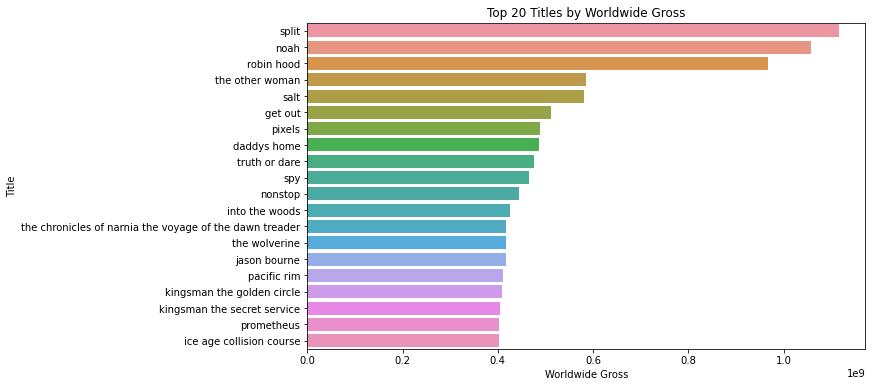

In [168]:
# Group by title and sum the 'worldwide_gross' for each title
title_grouped = df_cleaned.groupby('title')['worldwide_gross'].sum().reset_index()

# Sort by 'worldwide_gross' and select top 20 titles
title_sorted = title_grouped.sort_values(by='worldwide_gross', ascending=False).head(20)

# Plot top 20 titles by worldwide gross
plt.figure(figsize=(10, 6))
sns.barplot(x='worldwide_gross', y='title', data=title_sorted)
plt.title('Top 20 Titles by Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Title')
plt.show();

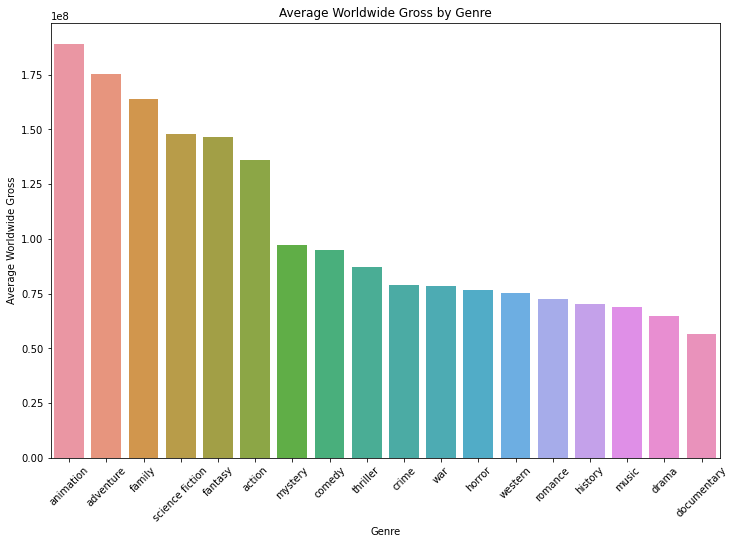

In [169]:
# Define the list of genre columns
genre_columns = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 
                'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'war', 'western']

# Calculate the average worldwide gross for each genre
genre_gross = pd.DataFrame()
for genre in genre_columns:
    genre_gross.at[genre, 'average_worldwide_gross'] = df_cleaned[df_cleaned[genre] == 1]['worldwide_gross'].mean()

# Sort by average worldwide gross
genre_gross = genre_gross.sort_values(by='average_worldwide_gross', ascending=False)

# Plot average worldwide gross by genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_gross.index, y=genre_gross['average_worldwide_gross'])
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=45)
plt.show();

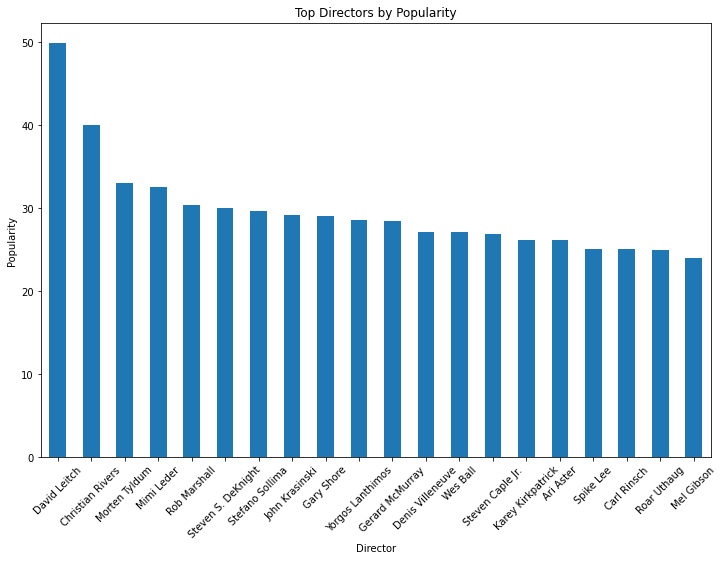

In [170]:
# Calculate the average popularity for each director and select top 20
director_popularity = df_cleaned.groupby('director')['popularity'].mean().sort_values(ascending=False).head(20)

# Plot top 20 directors by popularity
plt.figure(figsize=(12, 8))
director_popularity.plot(kind='bar')
plt.title('Top Directors by Popularity')
plt.xlabel('Director')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show();

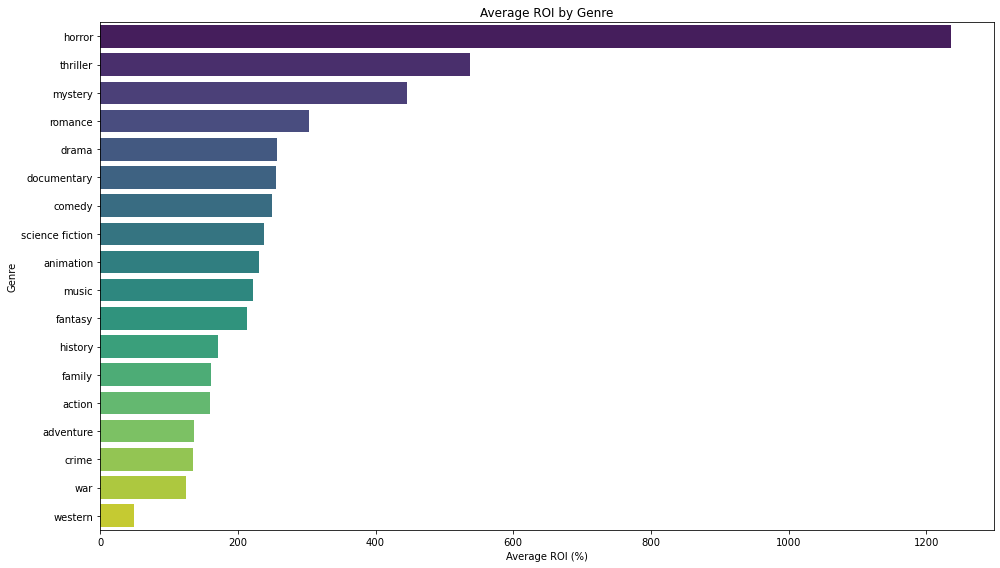

In [171]:
# Melt the DataFrame and filter for rows where the movie belongs to the genre
melted_df = df_cleaned.melt(id_vars=['title', 'roi'], value_vars=genre_columns, var_name='genre', value_name='is_genre')
melted_df = melted_df[melted_df['is_genre'] == 1]

# Group by genre and calculate the average ROI
genre_roi = melted_df.groupby('genre')['roi'].mean().reset_index()

# Sort by ROI in descending order and plot
genre_roi = genre_roi.sort_values(by='roi', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='roi', y='genre', data=genre_roi, palette='viridis')
plt.xlabel('Average ROI (%)')
plt.ylabel('Genre')
plt.title('Average ROI by Genre')
plt.tight_layout()
plt.show();

In [172]:
# Melt the DataFrame to create a long-format DataFrame with one row per movie-genre combination
melted_df = df_cleaned.melt(id_vars=['title', 'director', 'popularity'], value_vars=genre_columns, var_name='genre', value_name='is_genre')

# Filter out rows where the movie is not in the genre
melted_df = melted_df[melted_df['is_genre'] == 1]

# Group by director and genre and calculate the total popularity for each pair
director_genre_popularity = melted_df.groupby(['genre', 'director'])['popularity'].sum().reset_index()

# Find the most popular director for each genre
most_popular_director_by_genre = director_genre_popularity.loc[director_genre_popularity.groupby('genre')['popularity'].idxmax()]

print("Most popular director by genre:")
print(most_popular_director_by_genre)

Most popular director by genre:
                genre          director  popularity
47             action      David Leitch      99.785
325         adventure      Ridley Scott     107.868
393         animation     Mike Mitchell      42.773
647            comedy    Peter Farrelly      71.590
831             crime         Paul Feig      51.973
882       documentary     Jeff Tremaine      10.715
962             drama    Clint Eastwood      87.001
1413           family     Mike Mitchell      42.773
1512          fantasy     Mike Mitchell      42.773
1550          history    Clint Eastwood      38.352
1642           horror    James DeMonaco      71.763
1722            music   Damien Chazelle      35.082
1764          mystery     David Fincher      49.038
1872          romance  Derek Cianfrance      38.881
2019  science fiction  Denis Villeneuve      74.013
2152         thriller      David Leitch      99.785
2371              war     Morten Tyldum      33.078
2385          western    Gore Ve

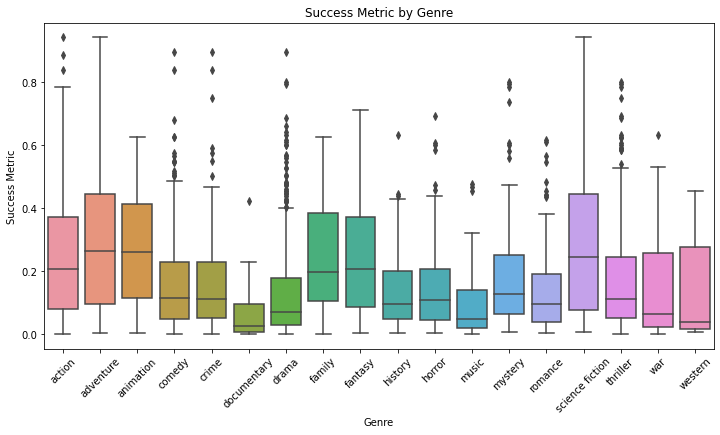

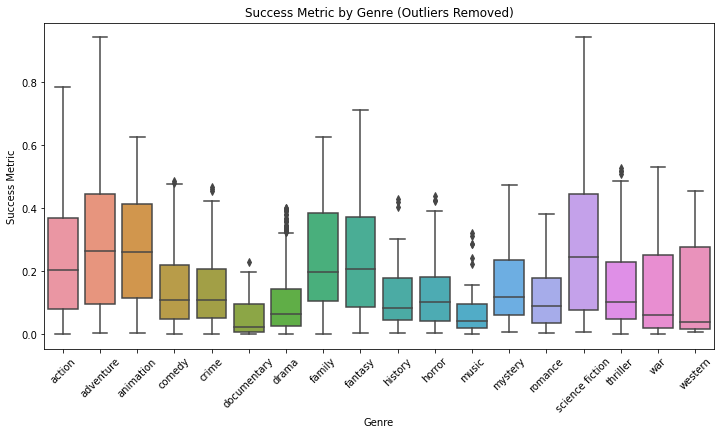

In [173]:
# Normalize 'worldwide_gross' and 'vote_count' columns, create a combined 'success_metric' based on these normalized values, then 
# inspect results

roi_min = df_cleaned['worldwide_gross'].min()
roi_max = df_cleaned['worldwide_gross'].max()
df_cleaned['normalized_worldwide_gross'] = (df_cleaned['worldwide_gross'] - roi_min) / (roi_max - roi_min)

vote_count_min = df_cleaned['vote_count'].min()
vote_count_max = df_cleaned['vote_count'].max()
df_cleaned['normalized_vote_count'] = (df_cleaned['vote_count'] - vote_count_min) / (vote_count_max - vote_count_min)

df_cleaned['success_metric'] = (df_cleaned['normalized_worldwide_gross'] + df_cleaned['normalized_vote_count']) / 2

df_cleaned.head()

# Melt the DataFrame to create a long-format DataFrame with one row per movie-genre combination
melted_df = df_cleaned.melt(id_vars=['primary_title', 'success_metric'], value_vars=genre_columns,
                            var_name='genre', value_name='genre_value')

# Filter out rows where the movie is not in the genre
melted_df = melted_df[melted_df['genre_value'] == 1]

# Plot the success metric by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='success_metric', data=melted_df)
plt.xticks(rotation=45)
plt.title('Success Metric by Genre')
plt.xlabel('Genre')
plt.ylabel('Success Metric')
plt.show()

# Remove outliers for success metric per genre
filtered_dfs = []
for genre in genre_columns:
    genre_df = melted_df[melted_df['genre'] == genre]
    filtered_df = remove_outliers(genre_df, 'success_metric')
    filtered_dfs.append(filtered_df)

# Concatenate the filtered DataFrames
filtered_melted_df = pd.concat(filtered_dfs)

# Plot the success metric by genre after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='success_metric', data=filtered_melted_df)
plt.xticks(rotation=45)
plt.title('Success Metric by Genre (Outliers Removed)')
plt.xlabel('Genre')
plt.ylabel('Success Metric')
plt.show();

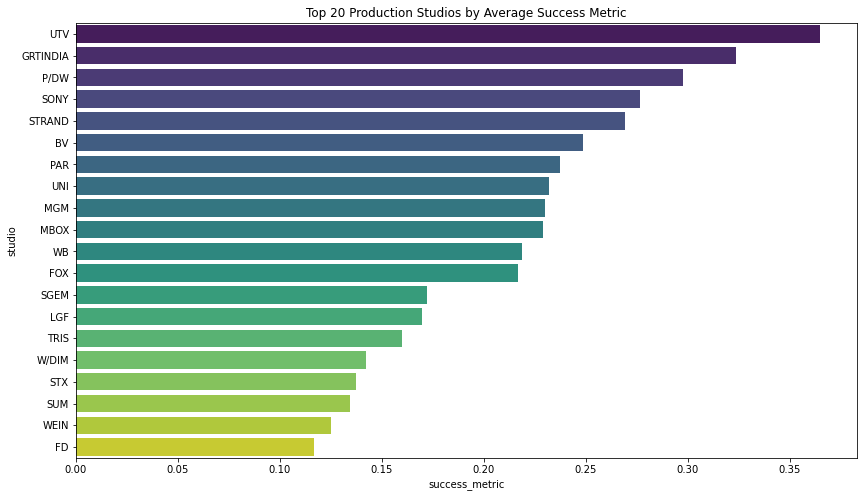

In [174]:
# Group by studio and calculate the average success metric for each studio
studio_success = df_cleaned.groupby('studio')['success_metric'].mean().reset_index()

# Sort the studios by their average success metric in descending order
studio_success = studio_success.sort_values(by='success_metric', ascending=False)

# Plot the success metric for the top studios
plt.figure(figsize=(14, 8))
sns.barplot(x='success_metric', y='studio', data=studio_success.head(20), palette='viridis')
plt.title('Top 20 Production Studios by Average Success Metric')
plt.show();